Подключите необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

Загрузите данные. Они находятся в директории input.

In [2]:
df = pd.read_csv('adult.csv')
df
# Target - income 
# Incomes/ salary prediction based on demographics and other features 
# describing people

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Визуализируйте распределение значений возраста для лиц, зарабатывающих > 50K и < 50K. Найдите среднее и стандартное отклонение возраста в каждой из групп.

C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,mean,std
income,,
<=50K,36.872184,14.104118
>50K,44.275178,10.558983


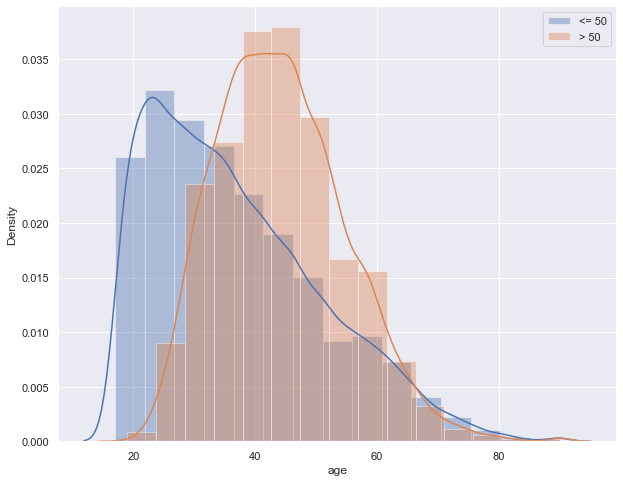

In [3]:
under_50_df = df.loc[df['income'] == '<=50K']
over_50_df = df.loc[df['income'] == '>50K']
sns.distplot(a = under_50_df['age'], bins = 15, label = '<= 50')
sns.distplot(a = over_50_df['age'], bins = 15, label = '> 50')
plt.legend()
df.groupby(['income'])['age'].describe()[['mean', 'std']]


Верно ли, что люди, зарабатывающие > 50K имеют как минимум полное среднее образование (значения **education** --- Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)? 

Filtered over Bachelor level: 5820
Filtered under Bachelor level: 5867


C:\Users\lolit\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


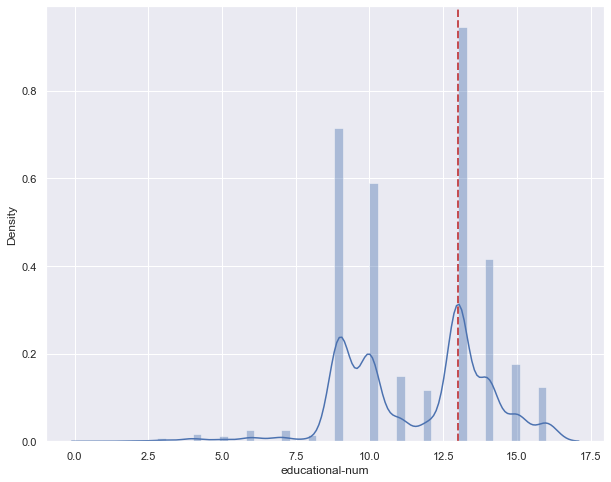

In [4]:
sns.distplot(a = over_50_df['educational-num'])

filtered_over_bachelor = over_50_df.loc[(over_50_df['educational-num'] >= 13)]
filtered_under_bachelor = over_50_df.loc[(over_50_df['educational-num'] < 13)]
print('Filtered over Bachelor level:', len(filtered_over_bachelor.index))
print('Filtered under Bachelor level:' ,len(filtered_under_bachelor.index))
plt.axvline(13, 0, 1, c='r', ls='--', lw=2)

# No, as it can be seen from the plot, there are pretty clear distribution tails 
# not only on the right side but also on the left side from red border 
# that corresponds Bachelor degree

Какие мужчины зарабаывают в среднем больше --- женатые или холостые?

In [5]:
df['is_income_over_50k'] = df['income'] == '>50K'
df["is_income_over_50k"] = df["is_income_over_50k"].astype(int)
married_men = df.loc[(df['marital-status'].str.startswith('Married')) & (df['gender'] == 'Male')]
not_married_men = df.loc[~(df['marital-status'].str.startswith('Married')) & (df['gender'] == 'Male')]
only_men_df = df.loc[(df['gender'] == 'Male')]

print('Overall married count: ',len(married_men.index))
print('Overall not married count: ',len(not_married_men.index))

print('Overall married mean: ', married_men['is_income_over_50k'].mean())
print('Overall not married mean: ', not_married_men['is_income_over_50k'].mean())

# Married ones (men) get higher incomes as it can be seen from mean values;
# Although a number of married men is apx. 2 times higher then for not-married 
# ones, the difference between mean values is still relatively big, 
# thus we can accept the first conclusion.

Overall married count:  20235
Overall not married count:  12415
Overall married mean:  0.44067210279219177
Overall not married mean:  0.0806282722513089


Married-civ-spouse       19899
Never-married             8899
Divorced                  2632
Separated                  599
Married-spouse-absent      324
Widowed                    285
Married-AF-spouse           12
Name: marital-status, dtype: int64

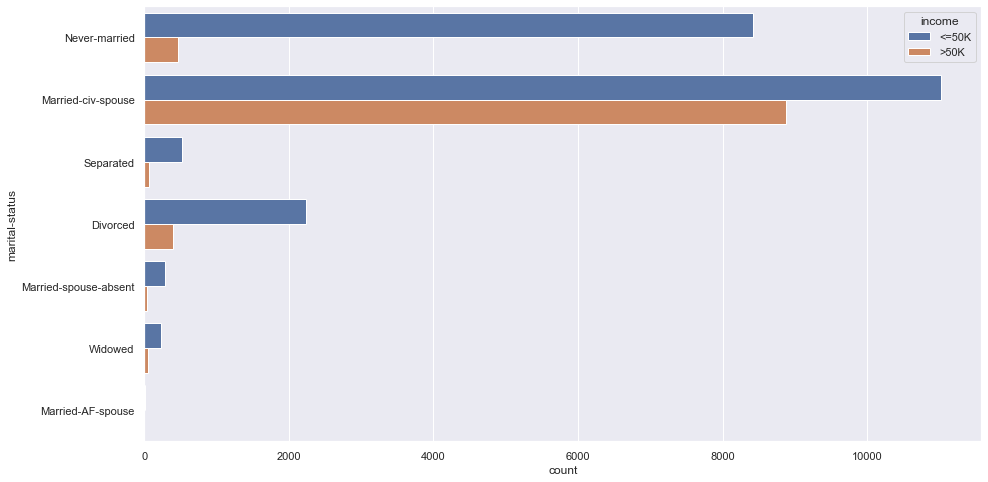

In [6]:
plt.figure(figsize=(15, 8))
sns.countplot(y='marital-status', hue='income', data=only_men_df)
only_men_df['marital-status'].value_counts()

Каково максимальное количество рабочих часов в неделю? Сколько людей работают такое количество времени и каков среди них процент тех, кто зарабатывает много?

In [7]:
print('Max working hours per week value:', df['hours-per-week'].max())
all_hard_workers = df.loc[(df['hours-per-week'] == 99)]
print('Number of people working the maximum hours per week:', len(all_hard_workers.index))
hard_high_paid_workers = df.loc[(df['hours-per-week'] == 99) & (df['income'] == '>50K')]
print(f'Percent of hard working people who earns more than 50K: {int(100 * (len(hard_high_paid_workers.index)/len(all_hard_workers.index)))} %')

Max working hours per week value: 99
Number of people working the maximum hours per week: 137
Percent of hard working people who earns more than 50K: 29 %


Что можно сказать о корреляции между количеством рабочих часов и зарплатой? Является ли она статистически значимой?

In [8]:
from scipy.stats import spearmanr, pearsonr

r = pearsonr(df['is_income_over_50k'], df['hours-per-week'])
print('Pearson correlation between income and hours per week:', r[0], 
'p-value:', r[1])

# There is a relatively small correlation (Pearson) between working hours and incomes,
# as well as p-value also occured to be small.
# As can be seen from the plot (Cell below) such a correlation is explainable,
# because almost for any educational level in order to earn more,
# higher work-hours load is required.

Spearman correlation between income and hours per week: 0.2276867605608157 p-value: 0.0


Как связан уровень образования и количество рабочих часов? Не забывайте о визуализации информации.

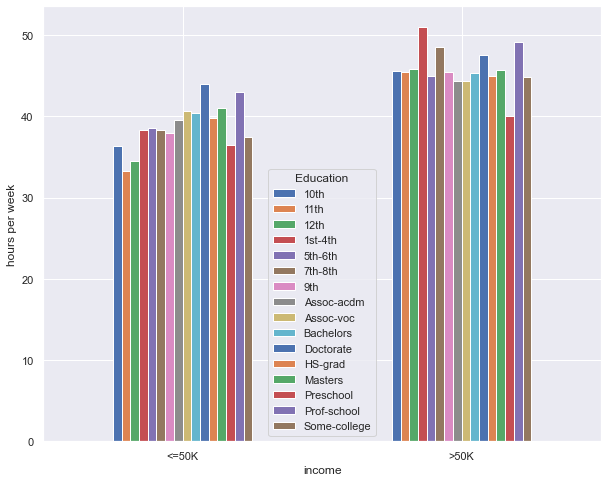

Pearson correlation between educational level and hours per week: 0.16443698800348566 p-value: 4.226589488968517e-293


<AxesSubplot:xlabel='hours-per-week', ylabel='educational-num'>

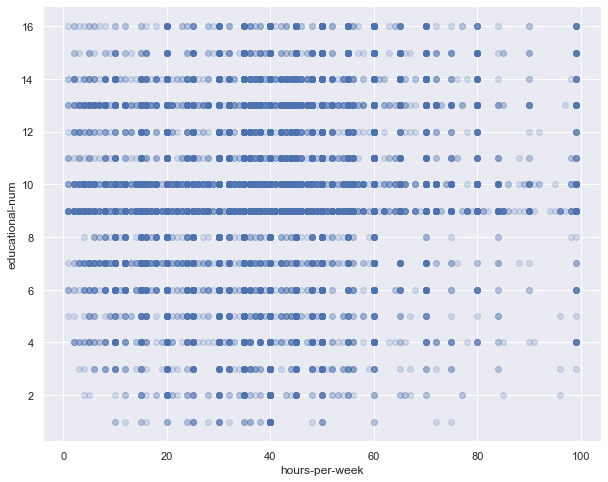

In [9]:
ct_to_plot = pd.crosstab(
    df['education'], 
    df['income'], 
    values=df['hours-per-week'],
    aggfunc=np.mean).T

ct_to_plot.plot.bar(rot=0)
plt.legend(title='Education')
plt.ylabel('hours per week')
plt.show()

r = spearmanr(df['educational-num'], df['hours-per-week'])
print('Spearman correlation between educational level and hours per week:', r[0], 
'p-value:', r[1])
sns.regplot(x = 'hours-per-week', y='educational-num', data=df, fit_reg = False, 
scatter_kws={"alpha": 0.2})

# There is some correlation between working hours load and education,
# p-value is fairly low. Such a correlation can be seen from two plots below,
# Although for both income groups people should work longer to earn more,
# for higher educational levels the value of such additional hours is lower than 
# for lower educational degree.

Визуализируйте распределение заработков (группы > 50K и < 50K) по странам. Какой вывод можно сделать?

Count rows without USA: 4153


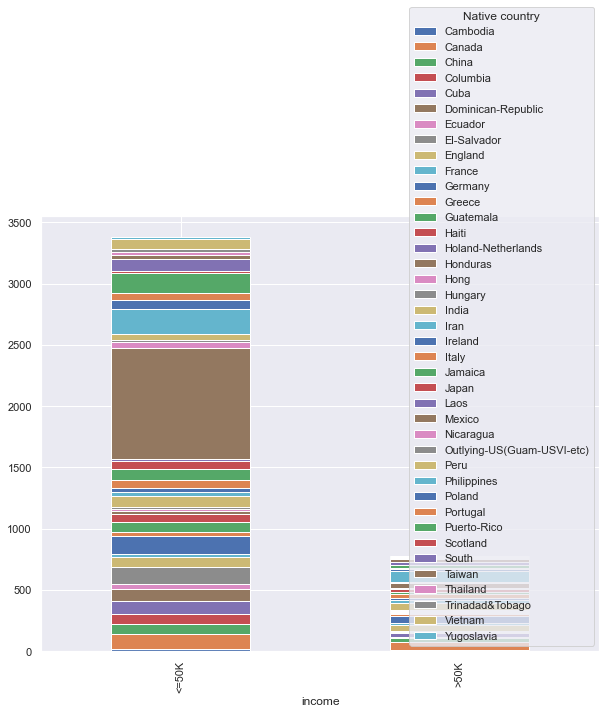

First three biggest category:
Mexico         951
Philippines    295
Germany        206
Name: native-country, dtype: int64


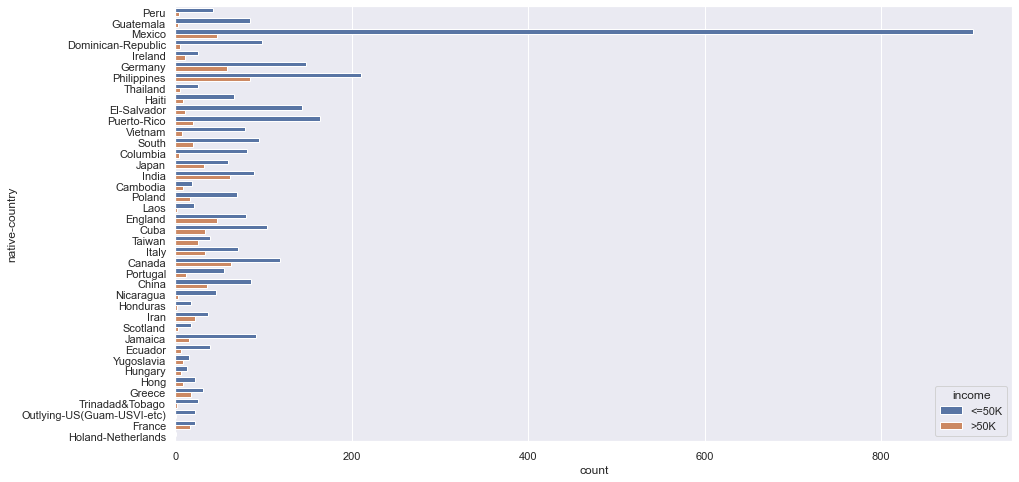

In [10]:
df_without_usa = df.loc[~df['native-country'].isin(['United-States', '?'])]
print('Count rows without USA:',len(df_without_usa.index))

ct_by_counties = pd.crosstab(df_without_usa['native-country'], 
    df_without_usa['income']).T
ct_by_counties.plot.bar(stacked=True)
plt.legend(title='Native country')
plt.show()

plt.figure(figsize=(15, 8))

sns.countplot(y='native-country', hue='income', data=df_without_usa)
print('First three biggest category:')
print(df_without_usa['native-country'].value_counts()[:3])

# As for USA there is 10 times more data, dataset was separated into groups,
# without USA and USA only;
# Tabs show that for any country the number of people making >50K is much
# smaller compared with <=50 incomes group. However, there is 
# a list of countries where difference between these 2 groups is not so great
# Among them: Germany, Philippines, England, Cuba, Taiwan, Italy, Canada, Iran
# These conclusions can not be fully accurate, cause non-USA data 
# by countries is not so rich
# What about USA group, there is 3 times bigger part of people with 
# <=50K incomes in comparison to >50K set.
#

USA-data only

Count only USA rows: 43832


<AxesSubplot:xlabel='count', ylabel='native-country'>

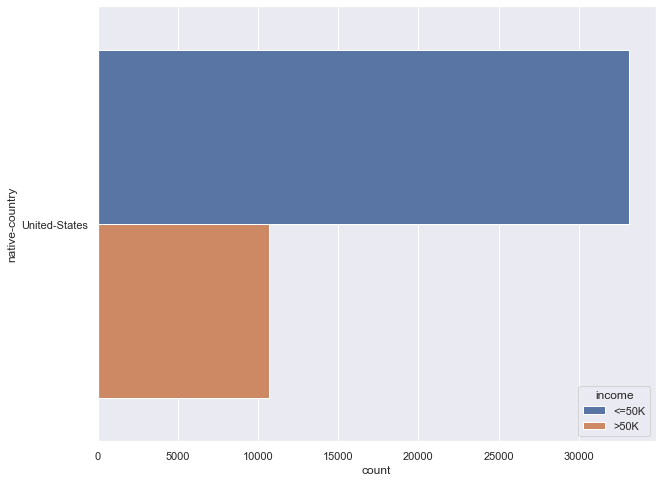

In [11]:
df_only_usa = df.loc[df['native-country'].isin(['United-States'])]
print('Count only USA rows:', len(df_only_usa.index))
sns.countplot(y='native-country', hue='income', data=df_only_usa)

Какие ещё инсайты можно найти в имеющихся данных? Творческое задание.

Occupation feature check

Count left rows: 46033


array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

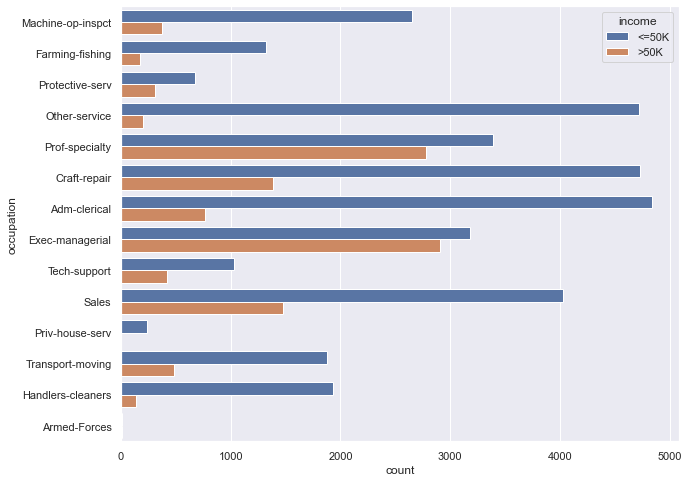

In [12]:
# filter rows non-info occupation data
df_occupation_cleaned = df.loc[~df['occupation'].isin(['?'])]
print('Count left rows:',len(df_occupation_cleaned.index))

sns.countplot(y='occupation', hue='income', data=df_occupation_cleaned)
df['occupation'].unique()

# the small difference between income groups can be found for
# Protective-serv, Exec-managerial, Tech-support, Sales.
# Nevertheless, data between all these occupation categories 
# is not distributed equally, so it is hard to give an estimation,
# if one or another category can impact the salary outcome.

Workclass feature check

Count left rows: 46043


<AxesSubplot:xlabel='count', ylabel='workclass'>

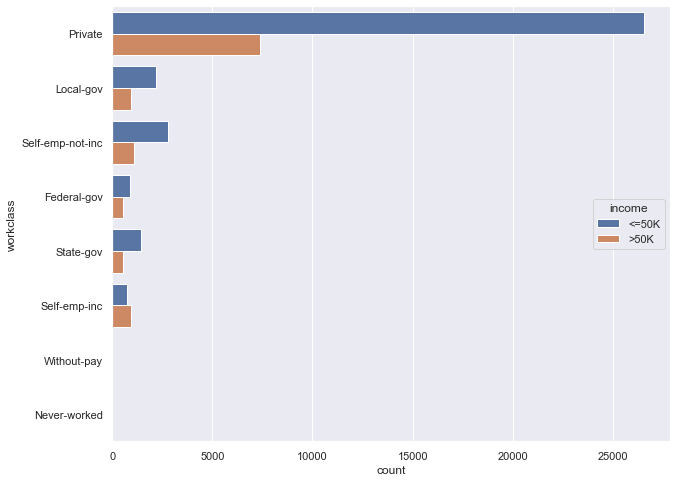

In [13]:
# filter rows non-info workclass data
df_workclass_cleaned = df.loc[~df['workclass'].isin(['?'])]
print('Count left rows:',len(df_workclass_cleaned.index))
sns.countplot(y='workclass', hue='income', data=df_workclass_cleaned)

# For most workclasses <=50K income group is apx. 3 times bigger than >50K one. 
# Private workclass gained the most data-rows, only for self-emp-inc >50K income
# group outruns <=50K one.

Women incomes data

Overall married count:  2809
Overall not married count:  13383
Overall married mean:  0.4054823780704877
Overall not married mean:  0.04707464694014795


Married-civ-spouse       19899
Never-married             8899
Divorced                  2632
Separated                  599
Married-spouse-absent      324
Widowed                    285
Married-AF-spouse           12
Name: marital-status, dtype: int64

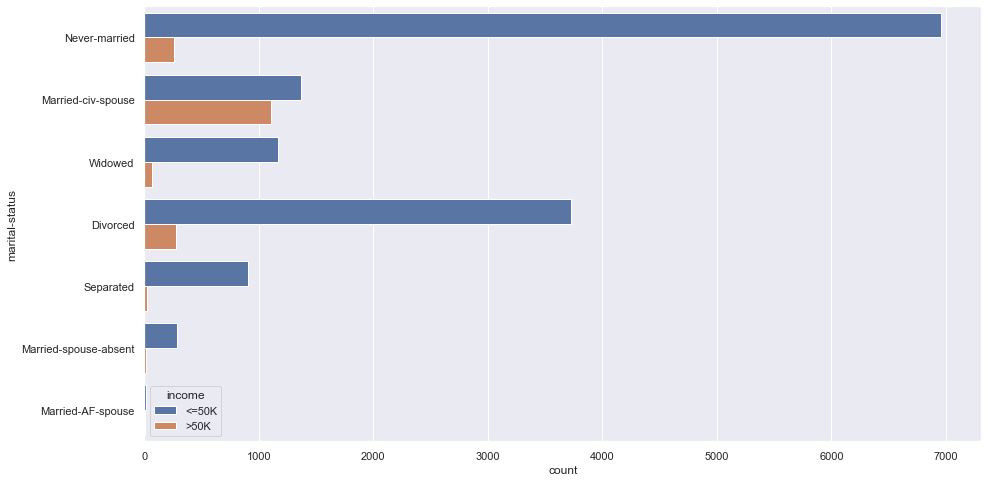

In [14]:
married_women = df.loc[(df['marital-status'].str.startswith('Married')) & (df['gender'] == 'Female')]
not_married_women = df.loc[~(df['marital-status'].str.startswith('Married')) & (df['gender'] == 'Female')]

print('Overall married count: ',len(married_women.index))
print('Overall not married count: ',len(not_married_women.index))

print('Overall married mean: ', married_women['is_income_over_50k'].mean())
print('Overall not married mean: ', not_married_women['is_income_over_50k'].mean())

only_woman_df = df.loc[(df['gender'] == 'Female')]
plt.figure(figsize=(15, 8))
sns.countplot(y='marital-status', hue='income', data=only_woman_df)
only_men_df['marital-status'].value_counts()

# Amost same results as for men separated data; for women there are fewer 
# data rows, for married ones (although it is relatively small group) ~40%
# obtain over 50k, on contrary for not-married women only ~5% get >50K
# Overall, for both genders there is a trend that married ones will get over 
# 50K income more possibly.

Fnlwgt, capital-loss/-gain features check

Spearman correlation for incomes by:
- fnlwgt: -0.005934363931014744 p-value: 0.18969367592978167
- capital-gain: 0.27773412927560365 p-value: 0.0
- capital-loss: 0.13824837022717731 p-value: 5.702850585688513e-207


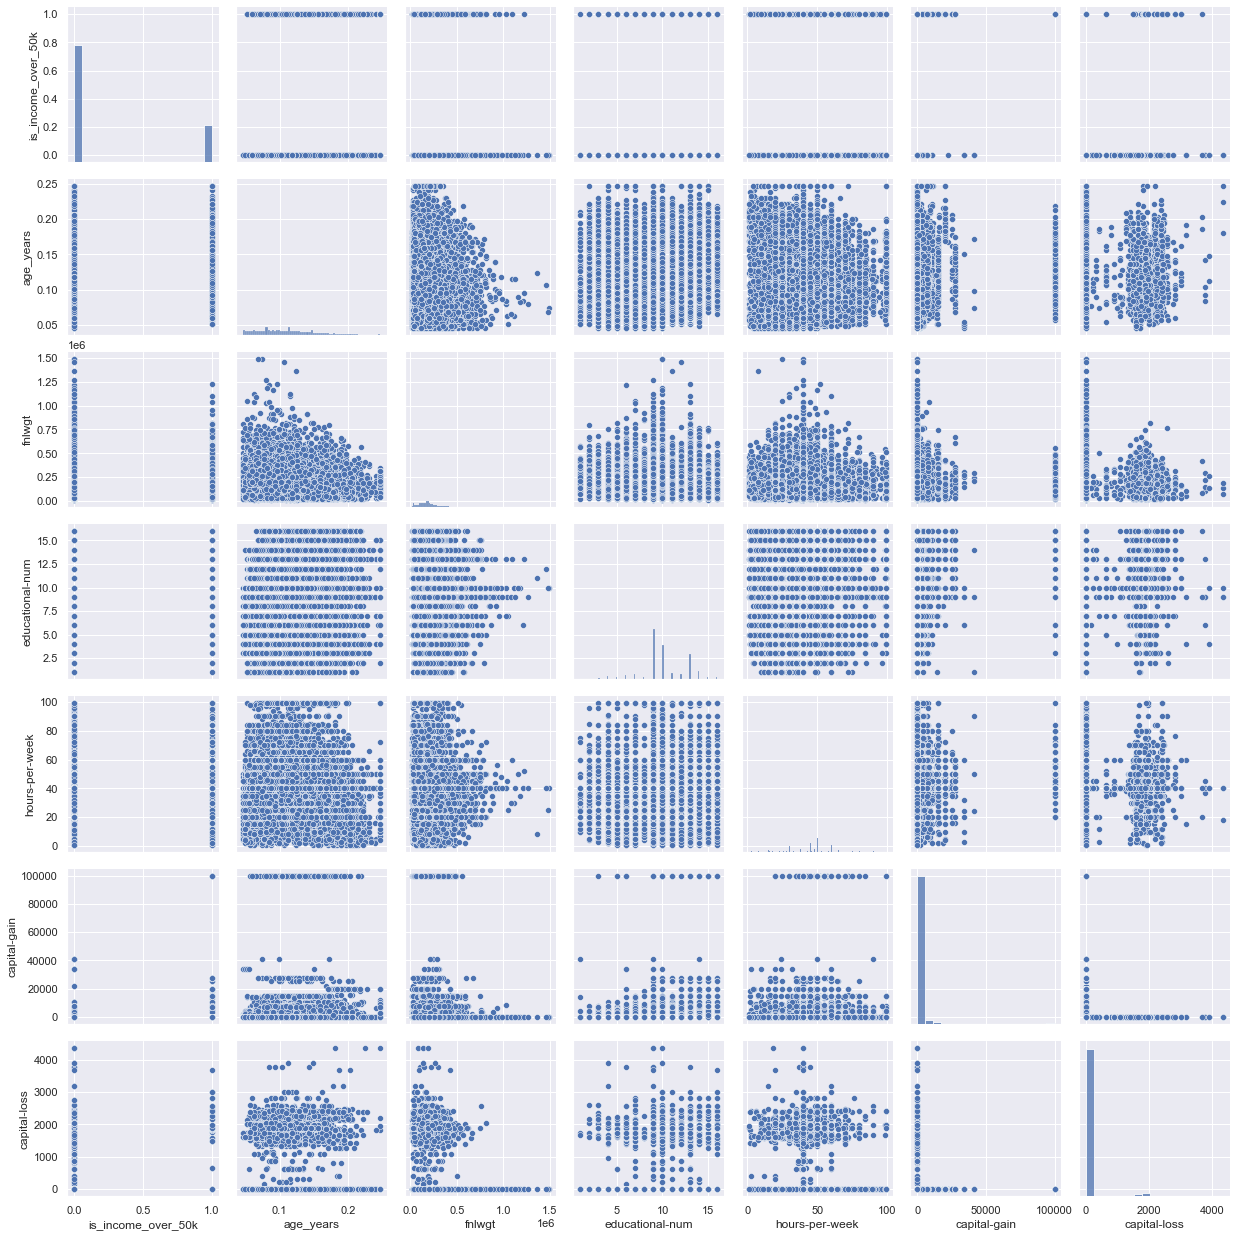

In [15]:
df['age_years'] = df['age'] / 365.25
numeric = ['is_income_over_50k', 'age_years', 'fnlwgt', 'educational-num', 'hours-per-week', 'capital-gain', 'capital-loss']
sns.pairplot(df[numeric])

r_fnlwgt = spearmanr(df['is_income_over_50k'], df['fnlwgt'])
r_cap_gain = spearmanr(df['is_income_over_50k'], df['capital-gain'])
r_cap_loss = spearmanr(df['is_income_over_50k'], df['capital-loss'])

print('Spearman correlation for incomes by:')
print('- fnlwgt:', r_fnlwgt[0], 'p-value:', r_fnlwgt[1])
print('- capital-gain:', r_cap_gain[0], 'p-value:', r_cap_gain[1])
print('- capital-loss:', r_cap_loss[0], 'p-value:', r_cap_loss[1])

# For capital loss and gain related to incomes pretty high correlation 
# can be noticed with small p-value. 
# But for these params data cleaning is needed, because there are many
# zero values in these columns, what can be just false or bad data.
# Fnlwgt param to incomes has negative small correlation with high p-value.